## ML Project: Human Activity Recognition (HAR) 

<br>
Huamn Activity Recognition (HAR) has emerged as a key research area because of its use for many different applications and its connection to many different fields such as medicine and human-computer interactions. For this project, we will be learning and recognizing the physical activities of humans based on wearable sensors, namely accelerometers. There is a wide range of applications for this such as elderly monitoring, assisting the sick and disabled, weight-loss programs, and more. 

This project will use a HAR dataset from the website: http://groupware.les.inf.puc-rio.br/har

In their experiment, 165,633 data samples were gathered from 4 subjects wearing accelerometers on their waist, left thigh, right arm, and right ankle. Each of the 4 sensors will give an x-y-z direction based on their position and orientation. Features such as age and body mass index were also considered. 

<img src="http://puu.sh/yHRJ4/80c40876bd.jpg" height="200" width="200">

The data will be used to verify 5 activity classes: if the subject is sitting, sitting down, standing, standing up, or walking. They did not specify what was the difference between sitting/sitting down or standing/standing up. 

Ugulino, who worked on the project, trained a classifier using the AdaBoost method and along with the C4.5 decision tree algorithm. His classifier accuracy was 99.4%. His research paper can be found on: http://groupware.les.inf.puc-rio.br/public/papers/2012.Ugulino.WearableComputing.HAR.Classifier.RIBBON.pdf. In his paper, he also provided a chart that includes other HAR researches using different datasets, their algorithms used, and their accuracy. No sample code was provided, so we will not use anything from past projects. 

For our project, we will test three different algorithms: Logistic Regression with and without cross validation, Support Vector Machines, and Neural Networks

## Load and Visualize the Data

First, we import the packages that we need.

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model, preprocessing

We will use `pd.read_csv` to load the 'HAR_data.txt' file. It can be downloaded from the website mentioned before. <br>
It has been renamed and changed to a txt file. Note that the data is separated by semicolons.<br>

The first six lines of the pandas dataframe is printed.

In [2]:
df = pd.read_csv('HAR_data.txt', header=0, sep=';', decimal=',')

df.head(6)

,user,gender,age,how_tall_in_meters,weight,body_mass_index,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,y4,z4,class
0,debora,Woman,46,1.62,75,28.6,-3,92,-63,-23,18,-19,5,104,-92,-150,-103,-147,sitting
1,debora,Woman,46,1.62,75,28.6,-3,94,-64,-21,18,-18,-14,104,-90,-149,-104,-145,sitting
2,debora,Woman,46,1.62,75,28.6,-1,97,-61,-12,20,-15,-13,104,-90,-151,-104,-144,sitting
3,debora,Woman,46,1.62,75,28.6,-2,96,-57,-15,21,-16,-13,104,-89,-153,-103,-142,sitting
4,debora,Woman,46,1.62,75,28.6,-1,96,-61,-13,20,-15,-13,104,-89,-153,-104,-143,sitting
5,debora,Woman,46,1.62,75,28.6,-2,95,-62,-14,19,-16,-13,104,-89,-153,-104,-142,sitting


The features we will use to predict the class are age, BMI which is based on height and weight, and the orientation of the 4 sensors. Extract the features to a matrix X and standardize it to Xs.

The 5 classes will be converted to numbers 0 to 4 and extracted to target variable y.
<br>
0 = sitting, 1 = sitting down, 2 = standing, 3 = standing up, 4 = walking

In [3]:
xnames = ['age','body_mass_index','x1','y1','z1','x2','y2','z2','x3','y3','z3','x4','y4','z4']
X = np.array(df[xnames])
Xs = preprocessing.scale(X)

y = np.unique(df['class'],return_inverse=True)[1]

nsamp = X.shape[0]
natt = X.shape[1]
print("Number of samples = %d, Number of attributes: %d" %(nsamp,natt))

Number of samples = 165633, Number of attributes: 14


## Logistic Regression 
First we will use logistic regression and measure the accuracy on the training data without cross validation. 
<br>
Create a `LogisticRegression` object and fit the training data.

In [4]:
logreg = linear_model.LogisticRegression(C=1e5)
logreg.fit(Xs,y)


LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

Measure the accuracy of the classifier. We will see that the accuracy is bad, so we will use cross validation on training and test data later on.

In [5]:
yhat = logreg.predict(Xs)
acc = np.mean(yhat==y)
print("Accuracy = %f" %acc)

Accuracy = 0.827697


## Interpreting the Weight Vector 
First we will look at the weight of each attribute and plot them.

<Container object of 3 artists>

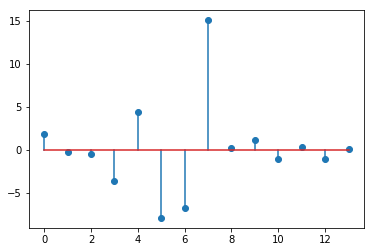

In [6]:
w = logreg.coef_[0]
plt.stem(w)

We will find the three attributes with the highest magnitude weight. 
<br> 
It turns out that y2, x2,and z2 has the largest weight, so the orientation of sensor 2 (accelerometer put on the left thigh) has a huge affect on the outcome.

In [7]:
wmag = np.absolute(w)
ind = np.argsort(wmag)[-3:]

print("The three attributes with the largest |weight| is: %s, %s, and %s" %(xnames[ind[0]],xnames[ind[1]],xnames[ind[2]]))

The three attributes with the largest |weight| is: y2, x2, and z2


## Cross Validation
Next we will perform a 10-fold cross validation on training and test sets. Shuffle the data since the classes are bunched together. 
<br>
Create a confusion matrix C by measuring and adding the confusion matrix across all folds. Normalize the rows of the matrix. 
<br>
Print the overall mean and SE of the test error rate across the folds.

[[ 0.99999  0.       0.       0.00001  0.     ]
 [ 0.01546  0.74248  0.17773  0.05009  0.01424]
 [ 0.       0.00004  0.98434  0.       0.01562]
 [ 0.00968  0.05599  0.13769  0.76661  0.03003]
 [ 0.       0.00008  0.07547  0.00053  0.92392]]

Error rate mean = 0.1724, SE = 0.0009


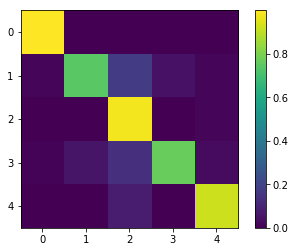

In [8]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold

nfold = 10 
kf = KFold(n_splits=nfold, shuffle=True) 

C = np.zeros((5,5))
err_rate = np.zeros(nfold)

for ifold, Ind in enumerate(kf.split(Xs)):
    
    Itr,Its, = Ind
    Xtr = Xs[Itr,:]
    ytr = y[Itr]
    Xts = Xs[Its,:]
    yts = y[Its]
    
    logreg.fit(Xtr,ytr)
    yhat = logreg.predict(Xts)
    
    C = C + confusion_matrix(yts,yhat)
    err_rate[ifold] = np.mean(yhat != yts)

Cnorm = preprocessing.normalize(C,axis=1)
Cnorm = np.square(Cnorm) 

print(np.array_str(Cnorm, precision=5, suppress_small=True))
plt.imshow(Cnorm, interpolation='none')
plt.colorbar()

err_mean = np.mean(err_rate)
err_se = np.std(err_rate)/np.sqrt(nfold-1)

print('')
print("Error rate mean = {0:.4f}, SE = {1:.4f}".format(err_mean, err_se))


The accuracy seems pretty good for classes 0,2, and 4 (92%+) but not for classes 1 and 3 (~75%). 
<br>
The error is probably because there are a lot less samples for classes 1 and 3. (sitting down and standing up)
<br>
Next we will use Support Vector Machines to get a better accuracy.  

## Support Vector Machine (SVM):
Create a SVM classifer. Use an "rbf" classifier with C=2.8 and gamma=0.0073.

In [9]:
from sklearn import svm

svc = svm.SVC(probability=False, kernel='rbf', C=2.8, gamma=.0073,verbose=10)

We will use about half of the samples for training and half for testing. Randomly select them. 

In [10]:
ntr = 80000
nts = 80000
ns = ntr + nts 

Iperm = np.random.permutation(nsamp)

Xtr = Xs[Iperm[:ntr],:]
ytr = y[Iperm[:ntr]]
Xts = Xs[Iperm[ntr:ns],:]
yts = y[Iperm[ntr:ns]]


Fit the training data. The fitting and predicting commands will take a few minutes since there are 160,000 samples.

In [11]:
svc.fit(Xtr,ytr)

[LibSVM]

SVC(C=2.8, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.0073, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=10)

Measure the accuracy on the test samples. 

In [12]:
yhat = svc.predict(Xts)
accuracy = np.mean(yhat==yts)
print("Accuracy = %f" %accuracy)


Accuracy = 0.947738


Print the normalized confusion matrix.

C:\Users\Teddy\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int32 was converted to float64 by the normalize function.
  warnings.warn(msg, _DataConversionWarning)


[[ 0.99999  0.       0.       0.00001  0.     ]
 [ 0.00059  0.99439  0.00361  0.00137  0.00005]
 [ 0.       0.       0.99984  0.       0.00016]
 [ 0.0004   0.00664  0.02573  0.9669   0.00033]
 [ 0.       0.00006  0.00607  0.00004  0.99383]]


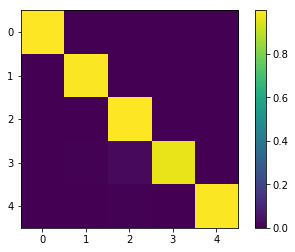

In [13]:
C2 = confusion_matrix(yts,yhat)

Cnorm2 = preprocessing.normalize(C2,axis=1)
Cnorm2 = np.square(Cnorm2) 

print(np.array_str(Cnorm2, precision=5, suppress_small=True))
plt.imshow(Cnorm2, interpolation='none')
plt.colorbar()

We see that the accuracy of the classifier is about 95%, which is much better than before. 
<br> 
To get an even better accuracy, we can try neural networks. 

## Neural Network Classifier:
Load the keras packages. 

In [14]:
import keras 

from keras.models import Model, Sequential
from keras.layers import Dense, Activation

Using TensorFlow backend.


Clear previous model layers.

In [15]:
import keras.backend as K
K.clear_session()

Like before, use 80,000 samples as training and test set. Scale the feature matrix.

In [16]:
Xtr = X[Iperm[:ntr],:]
ytr = y[Iperm[:ntr]]
Xts = X[Iperm[ntr:ns],:]
yts = y[Iperm[ntr:ns]]

X_mean = np.mean(Xtr,axis=0)
X_std = np.std(Xtr,axis=0)

Xtr_scale = (Xtr - X_mean)/ X_std
Xts_scale = (Xts - X_mean)/ X_std


Create a neural network model with: 
* nh = 256 hidden units 
* sigmoid activation
* output activation as softmax for multi-class targets

In [17]:
nin = Xtr.shape[1]
nout = np.max(ytr)+1  # 5 classes
nh = 256

model = Sequential()
model.add(Dense(nh, input_shape=(nin,), activation='sigmoid', name='hidden'))
model.add(Dense(nout, activation = 'softmax', name='output'))

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 256)               3840      
_________________________________________________________________
output (Dense)               (None, 5)                 1285      
Total params: 5,125
Trainable params: 5,125
Non-trainable params: 0
_________________________________________________________________


Create an optimizer and compile the model. Use the Adam optimizer with a learning rate of 0.001.

In [19]:
from keras import optimizers 

opt = optimizers.Adam(lr=0.001)
model.compile(optimizer=opt,
             loss ='sparse_categorical_crossentropy',
             metrics = ['accuracy'])

Fit the model for 10 epochs using the scaled data for both training and validation. Use a batch size of 100.  

In [20]:
batch_size = 100

model.fit(Xtr_scale, ytr, epochs=10, batch_size=batch_size, validation_data=(Xts_scale,yts))

Train on 80000 samples, validate on 80000 samples
Epoch 1/10
80000/80000 [==============================] - 9s 111us/step - loss: 0.6503 - acc: 0.7807 - val_loss: 0.4979 - val_acc: 0.8294
Epoch 2/10
80000/80000 [==============================] - 8s 96us/step - loss: 0.4561 - acc: 0.8399 - val_loss: 0.4279 - val_acc: 0.8431
Epoch 3/10
80000/80000 [==============================] - 8s 94us/step - loss: 0.3612 - acc: 0.8781 - val_loss: 0.3197 - val_acc: 0.8957
Epoch 4/10
80000/80000 [==============================] - 8s 95us/step - loss: 0.2811 - acc: 0.9118 - val_loss: 0.2533 - val_acc: 0.9206
Epoch 5/10
80000/80000 [==============================] - 8s 97us/step - loss: 0.2323 - acc: 0.9277 - val_loss: 0.2147 - val_acc: 0.9346
Epoch 6/10
80000/80000 [==============================] - 8s 95us/step - loss: 0.1985 - acc: 0.9389 - val_loss: 0.1869 - val_acc: 0.9444
Epoch 7/10
80000/80000 [==============================] - 8s 95us/step - loss: 0.1722 - acc: 0.9468 - val_loss: 0.1625 - val_ac

The accuracy should be around 96% after 10 epochs. We can fit the model again for another 10 epochs for a greater accuracy. 

In [21]:
model.fit(Xtr_scale, ytr, epochs=10, batch_size=batch_size, validation_data=(Xts_scale,yts))

Train on 80000 samples, validate on 80000 samples
Epoch 1/10
80000/80000 [==============================] - 8s 94us/step - loss: 0.1072 - acc: 0.9685 - val_loss: 0.1051 - val_acc: 0.9692
Epoch 2/10
80000/80000 [==============================] - 8s 94us/step - loss: 0.0974 - acc: 0.9719 - val_loss: 0.0946 - val_acc: 0.9734
Epoch 3/10
80000/80000 [==============================] - 8s 99us/step - loss: 0.0892 - acc: 0.9742 - val_loss: 0.0895 - val_acc: 0.9740
Epoch 4/10
80000/80000 [==============================] - 8s 95us/step - loss: 0.0826 - acc: 0.9765 - val_loss: 0.0837 - val_acc: 0.9756
Epoch 5/10
80000/80000 [==============================] - 8s 94us/step - loss: 0.0767 - acc: 0.9778 - val_loss: 0.0773 - val_acc: 0.9775
Epoch 6/10
80000/80000 [==============================] - 8s 95us/step - loss: 0.0721 - acc: 0.9792 - val_loss: 0.0724 - val_acc: 0.9790
Epoch 7/10
80000/80000 [==============================] - 8s 94us/step - loss: 0.0676 - acc: 0.9807 - val_loss: 0.0680 - val_acc

After another 10 epochs, the accuracy increased to 98%. 

## Evaluation
It seems like for HAR projects like this, neural networks work better than SVMs. In the chart of previous HAR researches, the highest NN accuracy was 99.6% and highest for SVM alone was 98.1%. When SVM was used together with other algorithms like Naive Bayes, the accuracy was as high as 99.4%. 
<br> 

Since the accuracy is this high for several classifiers, future works can include more classes so that we can predict more types of movements. The goal of the future is to monitor every single movements with the least amount of sensors and displaying it on a screen.